# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [162]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [163]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [164]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [165]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [166]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.679664
b   -2.665042
c   -1.276464
d   -1.794508
e   -0.157338
dtype: float64
a         NaN
b   -5.330084
c   -2.552928
d   -3.589015
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [167]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=15, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)

2023-11-22
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00', '2023-11-29 10:45:00',
               '2023-11-30 10:45:00', '2023-12-01 10:45:00',
               '2023-12-02 10:45:00', '2023-12-03 10:45:00',
               '2023-12-04 10:45:00', '2023-12-05 10:45:00',
               '2023-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [168]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 0))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2260/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
9178790400000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [169]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00    10.780906
2023-11-23 10:45:00    10.573040
2023-11-24 10:45:00     8.093154
2023-11-25 10:45:00    10.007014
Freq: D, dtype: float64 

2023-11-22 10:45:00    10.780906
2023-11-23 10:45:00    10.573040
2023-11-24 10:45:00     8.093154
2023-11-25 10:45:00    10.007014
2023-11-26 10:45:00     9.272051
2023-11-27 10:45:00     9.313004
2023-11-28 10:45:00    10.563135
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [170]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [171]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,0.526593,0.506931,-0.028920,0.462814
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,-0.178428
2023-11-22 12:45:00,0.459713,0.229562,0.005941,0.992621
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,-1.048985
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,0.547099
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,-0.599292
2023-11-22 16:45:00,0.546157,0.171893,1.451570,0.813011
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,0.525021
2023-11-22 18:45:00,0.733246,0.572918,0.919003,-0.215788
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,-1.255220


or by means of a dictionary:


In [172]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [173]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,0.526593,0.506931,-0.028920,0.462814
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,-0.178428


In [174]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,0.546157,0.171893,1.451570,0.813011
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,0.525021
2023-11-22 18:45:00,0.733246,0.572918,0.919003,-0.215788
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,-1.255220


In [175]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [176]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [177]:
df.values

array([[ 0.52659338,  0.50693052, -0.02892021,  0.46281419],
       [-0.30747892, -1.14841672, -1.27863298, -0.17842791],
       [ 0.4597131 ,  0.22956249,  0.00594137,  0.99262119],
       [-2.04659272, -2.39847463, -0.00857175, -1.04898499],
       [ 0.72769495, -1.11800279,  0.08541167,  0.54709946],
       [-0.59125231, -1.45926667,  0.28686712, -0.59929157],
       [ 0.54615654,  0.17189323,  1.45156954,  0.81301066],
       [-0.39951369, -0.92383559,  0.61275517,  0.52502104],
       [ 0.73324606,  0.57291827,  0.91900326, -0.21578792],
       [-0.78281936,  1.31017853,  0.77976025, -1.25521997]])

In [178]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.113425,-0.425651,0.282518,0.004285
std,0.890102,1.148750,0.735027,0.785193
min,-2.046593,-2.398475,-1.278633,-1.255220
25%,-0.543318,-1.140813,-0.004943,-0.503416
50%,0.076117,-0.375971,0.186139,0.142193
75%,0.541266,0.437589,0.738009,0.541580
max,0.733246,1.310179,1.451570,0.992621


In [179]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,0.526593,-0.307479,0.459713,-2.046593,0.727695,-0.591252,0.546157,-0.399514,0.733246,-0.782819
B,0.506931,-1.148417,0.229562,-2.398475,-1.118003,-1.459267,0.171893,-0.923836,0.572918,1.310179
C,-0.028920,-1.278633,0.005941,-0.008572,0.085412,0.286867,1.451570,0.612755,0.919003,0.779760
D,0.462814,-0.178428,0.992621,-1.048985,0.547099,-0.599292,0.813011,0.525021,-0.215788,-1.255220


In [180]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,-1.255220
2023-11-22 18:45:00,0.733246,0.572918,0.919003,-0.215788
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,0.525021
2023-11-22 16:45:00,0.546157,0.171893,1.451570,0.813011
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,-0.599292
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,0.547099
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,-1.048985
2023-11-22 12:45:00,0.459713,0.229562,0.005941,0.992621
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,-0.178428
2023-11-22 10:45:00,0.526593,0.506931,-0.028920,0.462814


In [181]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,-0.178428
2023-11-22 10:45:00,0.526593,0.506931,-0.028920,0.462814
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,-1.048985
2023-11-22 12:45:00,0.459713,0.229562,0.005941,0.992621
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,0.547099
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,-0.599292
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,0.525021
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,-1.255220
2023-11-22 18:45:00,0.733246,0.572918,0.919003,-0.215788
2023-11-22 16:45:00,0.546157,0.171893,1.451570,0.813011


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [182]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2023-11-22 10:45:00    0.526593
2023-11-22 11:45:00   -0.307479
2023-11-22 12:45:00    0.459713
2023-11-22 13:45:00   -2.046593
2023-11-22 14:45:00    0.727695
2023-11-22 15:45:00   -0.591252
2023-11-22 16:45:00    0.546157
2023-11-22 17:45:00   -0.399514
2023-11-22 18:45:00    0.733246
2023-11-22 19:45:00   -0.782819
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00    0.526593
2023-11-22 11:45:00   -0.307479
2023-11-22 12:45:00    0.459713
2023-11-22 13:45:00   -2.046593
2023-11-22 14:45:00    0.727695
2023-11-22 15:45:00   -0.591252
2023-11-22 16:45:00    0.546157
2023-11-22 17:45:00   -0.399514
2023-11-22 18:45:00    0.733246
2023-11-22 19:45:00   -0.782819
Freq: H, Name: A, dtype: float64


In [183]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00  0.526593  0.506931 -0.028920  0.462814
2023-11-22 11:45:00 -0.307479 -1.148417 -1.278633 -0.178428
2023-11-22 12:45:00  0.459713  0.229562  0.005941  0.992621
                            A         B         C         D
2023-11-22 10:45:00  0.526593  0.506931 -0.028920  0.462814
2023-11-22 11:45:00 -0.307479 -1.148417 -1.278633 -0.178428
2023-11-22 12:45:00  0.459713  0.229562  0.005941  0.992621


### Selection by label

In [184]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.526593
B    0.506931
C   -0.028920
D    0.462814
Name: 2023-11-22 10:45:00, dtype: float64

In [185]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,0.526593,0.506931
2023-11-22 11:45:00,-0.307479,-1.148417
2023-11-22 12:45:00,0.459713,0.229562
2023-11-22 13:45:00,-2.046593,-2.398475
2023-11-22 14:45:00,0.727695,-1.118003
2023-11-22 15:45:00,-0.591252,-1.459267
2023-11-22 16:45:00,0.546157,0.171893
2023-11-22 17:45:00,-0.399514,-0.923836
2023-11-22 18:45:00,0.733246,0.572918
2023-11-22 19:45:00,-0.782819,1.310179


In [186]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,0.727695,-1.118003
2023-11-22 15:45:00,-0.591252,-1.459267
2023-11-22 16:45:00,0.546157,0.171893


In [187]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.3074789245673765
-0.3074789245673765


### Selecting by position

In [188]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -2.046593
B   -2.398475
C   -0.008572
D   -1.048985
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00 -2.046593 -2.398475
2023-11-22 14:45:00  0.727695 -1.118003


In [189]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,-0.307479,-1.278633
2023-11-22 12:45:00,0.459713,0.005941
2023-11-22 14:45:00,0.727695,0.085412


In [190]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00 -0.307479 -1.148417 -1.278633 -0.178428
2023-11-22 12:45:00  0.459713  0.229562  0.005941  0.992621 

                            B         C
2023-11-22 10:45:00  0.506931 -0.028920
2023-11-22 11:45:00 -1.148417 -1.278633
2023-11-22 12:45:00  0.229562  0.005941
2023-11-22 13:45:00 -2.398475 -0.008572
2023-11-22 14:45:00 -1.118003  0.085412
2023-11-22 15:45:00 -1.459267  0.286867
2023-11-22 16:45:00  0.171893  1.451570
2023-11-22 17:45:00 -0.923836  0.612755
2023-11-22 18:45:00  0.572918  0.919003
2023-11-22 19:45:00  1.310179  0.779760


In [191]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


-1.1484167154732294

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [192]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 10:45:00,0.526593,0.506931,-0.028920,0.462814
2023-11-22 12:45:00,0.459713,0.229562,0.005941,0.992621
2023-11-22 16:45:00,0.546157,0.171893,1.451570,0.813011
2023-11-22 18:45:00,0.733246,0.572918,0.919003,-0.215788
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,-1.255220


In [193]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,0.526593,0.506931,NaN,0.462814
2023-11-22 11:45:00,NaN,NaN,NaN,NaN
2023-11-22 12:45:00,0.459713,0.229562,0.005941,0.992621
2023-11-22 13:45:00,NaN,NaN,NaN,NaN
2023-11-22 14:45:00,0.727695,NaN,0.085412,0.547099
2023-11-22 15:45:00,NaN,NaN,0.286867,NaN
2023-11-22 16:45:00,0.546157,0.171893,1.451570,0.813011
2023-11-22 17:45:00,NaN,NaN,0.612755,0.525021
2023-11-22 18:45:00,0.733246,0.572918,0.919003,NaN
2023-11-22 19:45:00,NaN,1.310179,0.779760,NaN


### Setting

Combination of selection and setting of values

In [194]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = df['A']-df['B']

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [195]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,5.0,0.840938,2
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,5.0,0.351882,6
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,5.0,1.845698,8
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,10
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,14
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,18


In [196]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0,0.999961
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,5.0,0.840938,2,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4,0.999992
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,5.0,0.351882,6,0.999981
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,5.0,1.845698,8,0.999481
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,10,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12,0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,14,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16,0.999996
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,18,0.999333


In [197]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.506931,-0.028920,-5.0,-0.506931,0,-0.999961
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,-5.0,-0.840938,-2,-0.999892
2023-11-22 12:45:00,-0.459713,-0.229562,-0.005941,-5.0,-0.230151,-4,-0.999992
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,-5.0,-0.351882,-6,-0.999981
2023-11-22 14:45:00,-0.727695,-1.118003,-0.085412,-5.0,-1.845698,-8,-0.999481
2023-11-22 15:45:00,-0.591252,-1.459267,-0.286867,-5.0,-0.868014,-10,-0.999885
2023-11-22 16:45:00,-0.546157,-0.171893,-1.451570,-5.0,-0.374263,-12,-0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,-0.612755,-5.0,-0.524322,-14,-0.999958
2023-11-22 18:45:00,-0.733246,-0.572918,-0.919003,-5.0,-0.160328,-16,-0.999996
2023-11-22 19:45:00,-0.782819,-1.310179,-0.779760,-5.0,-2.092998,-18,-0.999333


In [198]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0,0.999961
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,5.0,0.840938,2,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4,0.999992
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,5.0,0.351882,6,0.999981
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,5.0,1.845698,8,0.999481
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,10,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12,0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,14,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16,0.999996
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,18,0.999333


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [199]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0.999961
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,5.0,0.840938,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,0.999992
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,5.0,0.351882,0.999981
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,5.0,1.845698,0.999481
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,0.999996
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,0.999333


In [200]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0,0.999961
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,10,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12,0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,14,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16,0.999996
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,18,0.999333


In [201]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0,0.999961
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,5.0,0.840938,2,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4,0.999992
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,5.0,0.351882,6,0.999981
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,5.0,1.845698,8,0.999481
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,10,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12,0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,14,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16,0.999996
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,18,0.999333


In [202]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0,0.999961
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,5.0,0.840938,2,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4,0.999992
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,5.0,0.351882,6,0.999981
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,5.0,1.845698,8,0.999481
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,10,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12,0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,14,0.999958
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,18,0.999333


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [203]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,0.506931,NaN,5.0,NaN,NaN,0.999961
2023-11-22 11:45:00,NaN,NaN,NaN,5.0,0.840938,2.0,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4.0,0.999992
2023-11-22 13:45:00,NaN,NaN,NaN,5.0,0.351882,6.0,0.999981
2023-11-22 14:45:00,0.727695,NaN,0.085412,5.0,1.845698,8.0,0.999481
2023-11-22 15:45:00,NaN,NaN,0.286867,5.0,0.868014,10.0,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12.0,0.999979
2023-11-22 17:45:00,NaN,NaN,0.612755,5.0,0.524322,14.0,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16.0,0.999996
2023-11-22 19:45:00,NaN,1.310179,0.779760,5.0,NaN,18.0,0.999333


In [204]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4.0,0.999992
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12.0,0.999979
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16.0,0.999996


In [205]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,False,True,False,True,True,False
2023-11-22 11:45:00,True,True,True,False,False,False,False
2023-11-22 12:45:00,False,False,False,False,False,False,False
2023-11-22 13:45:00,True,True,True,False,False,False,False
2023-11-22 14:45:00,False,True,False,False,False,False,False
2023-11-22 15:45:00,True,True,False,False,False,False,False
2023-11-22 16:45:00,False,False,False,False,False,False,False
2023-11-22 17:45:00,True,True,False,False,False,False,False
2023-11-22 18:45:00,False,False,False,False,False,False,False
2023-11-22 19:45:00,True,False,False,False,True,False,False


In [206]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,0.000000,5.0,0.000000,0.0,0.999961
2023-11-22 11:45:00,0.000000,0.000000,0.000000,5.0,0.840938,2.0,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4.0,0.999992
2023-11-22 13:45:00,0.000000,0.000000,0.000000,5.0,0.351882,6.0,0.999981
2023-11-22 14:45:00,0.727695,0.000000,0.085412,5.0,1.845698,8.0,0.999481
2023-11-22 15:45:00,0.000000,0.000000,0.286867,5.0,0.868014,10.0,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12.0,0.999979
2023-11-22 17:45:00,0.000000,0.000000,0.612755,5.0,0.524322,14.0,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16.0,0.999996
2023-11-22 19:45:00,0.000000,1.310179,0.779760,5.0,0.000000,18.0,0.999333


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [207]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,0.506931,NaN,5.0,NaN,NaN,0.999961
2023-11-22 11:45:00,NaN,0.506931,NaN,5.0,0.840938,2.0,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4.0,0.999992
2023-11-22 13:45:00,0.459713,0.229562,0.005941,5.0,0.351882,6.0,0.999981
2023-11-22 14:45:00,0.727695,0.229562,0.085412,5.0,1.845698,8.0,0.999481
2023-11-22 15:45:00,0.727695,0.229562,0.286867,5.0,0.868014,10.0,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12.0,0.999979
2023-11-22 17:45:00,0.546157,0.171893,0.612755,5.0,0.524322,14.0,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16.0,0.999996
2023-11-22 19:45:00,0.733246,1.310179,0.779760,5.0,0.160328,18.0,0.999333


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [208]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.166085
B         -0.425651
C          0.282518
D          5.000000
E          0.259567
E prime    9.000000
cosine     0.999846
dtype: float64 

2023-11-22 10:45:00    0.853006
2023-11-22 11:45:00    0.872329
2023-11-22 12:45:00    1.560766
2023-11-22 13:45:00    1.128318
2023-11-22 14:45:00    2.220040
2023-11-22 15:45:00    2.157750
2023-11-22 16:45:00    2.934837
2023-11-22 17:45:00    2.830527
2023-11-22 18:45:00    3.483642
2023-11-22 19:45:00    3.316208
Freq: H, dtype: float64 



In [209]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0,0.999961
2023-11-22 11:45:00,-0.307479,-0.641486,-1.307553,10.0,0.334007,2,1.999853
2023-11-22 12:45:00,0.152234,-0.411924,-1.301612,15.0,0.564158,6,2.999845
2023-11-22 13:45:00,-1.894359,-2.810398,-1.310184,20.0,0.916040,12,3.999826
2023-11-22 14:45:00,-1.166664,-3.928401,-1.224772,25.0,2.761738,20,4.999307
2023-11-22 15:45:00,-1.757916,-5.387668,-0.937905,30.0,3.629752,30,5.999193
2023-11-22 16:45:00,-1.211759,-5.215775,0.513665,35.0,4.004015,42,6.999171
2023-11-22 17:45:00,-1.611273,-6.139610,1.126420,40.0,4.528337,56,7.999129
2023-11-22 18:45:00,-0.878027,-5.566692,2.045423,45.0,4.688665,72,8.999126
2023-11-22 19:45:00,-1.660846,-4.256513,2.825183,50.0,2.595667,90,9.998458


In [210]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.506931,-0.028920,5.0,-0.506931,0,0.999961
2023-11-22 11:45:00,-0.307479,-1.148417,-1.278633,5.0,0.840938,2,0.999892
2023-11-22 12:45:00,0.459713,0.229562,0.005941,5.0,0.230151,4,0.999992
2023-11-22 13:45:00,-2.046593,-2.398475,-0.008572,5.0,0.351882,6,0.999981
2023-11-22 14:45:00,0.727695,-1.118003,0.085412,5.0,1.845698,8,0.999481
2023-11-22 15:45:00,-0.591252,-1.459267,0.286867,5.0,0.868014,10,0.999885
2023-11-22 16:45:00,0.546157,0.171893,1.451570,5.0,0.374263,12,0.999979
2023-11-22 17:45:00,-0.399514,-0.923836,0.612755,5.0,0.524322,14,0.999958
2023-11-22 18:45:00,0.733246,0.572918,0.919003,5.0,0.160328,16,0.999996
2023-11-22 19:45:00,-0.782819,1.310179,0.779760,5.0,-2.092998,18,0.999333


In [211]:
df.apply(lambda x: x.max() - x.min())

A           2.779839
B           3.708653
C           2.730203
D           0.000000
E           3.938696
E prime    18.000000
cosine      0.000663
dtype: float64

In [212]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00    0.506931
2023-11-22 11:45:00   -1.455896
2023-11-22 12:45:00    0.689276
2023-11-22 13:45:00   -4.445067
2023-11-22 14:45:00   -0.390308
2023-11-22 15:45:00   -2.050519
2023-11-22 16:45:00    0.718050
2023-11-22 17:45:00   -1.323349
2023-11-22 18:45:00    1.306164
2023-11-22 19:45:00    0.527359
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [213]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [214]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [215]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [216]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [217]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.612984,-0.460420,-1.683331,-0.084125
1,0.079417,0.692184,-0.215771,-0.325619
2,-0.735666,-0.142829,-0.084661,1.173906
3,1.521960,-0.592138,1.700433,-1.428720
4,0.351465,0.739888,1.110406,1.183477
5,0.469847,0.859574,-0.895648,-0.440074
6,-2.625004,0.656501,-0.146271,0.522351
7,-0.059733,-0.964062,-1.445167,-0.318548
8,0.078388,-0.341166,0.308533,-0.109843
9,1.181943,-3.465315,1.715434,-1.959806


In [218]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.612984 -0.460420 -1.683331 -0.084125
 1  0.079417  0.692184 -0.215771 -0.325619
 2 -0.735666 -0.142829 -0.084661  1.173906,
           0         1         2         3
 3  1.521960 -0.592138  1.700433 -1.428720
 4  0.351465  0.739888  1.110406  1.183477
 5  0.469847  0.859574 -0.895648 -0.440074
 6 -2.625004  0.656501 -0.146271  0.522351,
           0         1         2         3
 7 -0.059733 -0.964062 -1.445167 -0.318548
 8  0.078388 -0.341166  0.308533 -0.109843
 9  1.181943 -3.465315  1.715434 -1.959806]

In [219]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.612984,-0.460420,-1.683331,-0.084125
1,0.079417,0.692184,-0.215771,-0.325619
2,-0.735666,-0.142829,-0.084661,1.173906
3,1.521960,-0.592138,1.700433,-1.428720
4,0.351465,0.739888,1.110406,1.183477
5,0.469847,0.859574,-0.895648,-0.440074
6,-2.625004,0.656501,-0.146271,0.522351
7,-0.059733,-0.964062,-1.445167,-0.318548
8,0.078388,-0.341166,0.308533,-0.109843
9,1.181943,-3.465315,1.715434,-1.959806


In [220]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,0.612984,-0.460420,-1.683331,-0.084125
1,0.079417,0.692184,-0.215771,-0.325619
2,-0.735666,-0.142829,-0.084661,1.173906
3,1.521960,-0.592138,1.700433,-1.428720
4,0.351465,0.739888,1.110406,1.183477
5,0.469847,0.859574,-0.895648,-0.440074
6,-2.625004,0.656501,-0.146271,0.522351
7,-0.059733,-0.964062,-1.445167,-0.318548
8,0.078388,-0.341166,0.308533,-0.109843
9,1.181943,-3.465315,1.715434,-1.959806


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [221]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [222]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.245904,-2.252735
1,bar,one,-0.718684,1.834396
2,foo,two,0.612495,0.306809
3,bar,three,0.800709,0.351857
4,foo,two,0.063274,-1.038303
5,bar,two,0.912141,1.481264
6,foo,one,-1.619462,1.358158
7,foo,three,0.257368,0.010188


In [223]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,0.994167,3.667517
foo,onetwotwoonethree,0.559580,-1.615884


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [224]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -1.345636
       two      -0.415995
baz    one       1.122170
       two       2.730139
foo    one       1.259685
       two      -0.011394
qux    one       1.205258
       two       0.877106
dtype: float64


In [225]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.718684  1.834396
    three  0.800709  0.351857
    two    0.912141  1.481264
foo one   -0.373557 -0.894577
    three  0.257368  0.010188
    two    0.675769 -0.731495

In [226]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.718684
            D    1.834396
     three  C    0.800709
            D    0.351857
     two    C    0.912141
            D    1.481264
foo  one    C   -0.373557
            D   -0.894577
     three  C    0.257368
            D    0.010188
     two    C    0.675769
            D   -0.731495
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

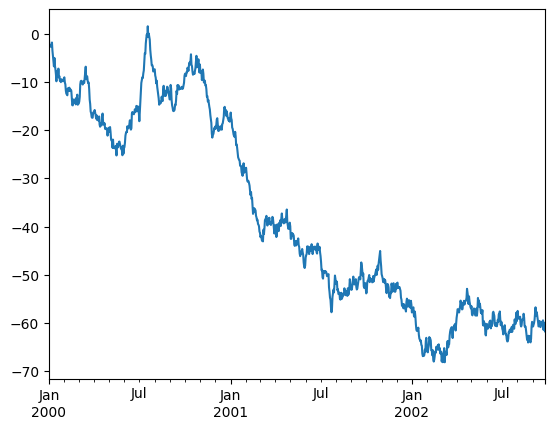

In [227]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

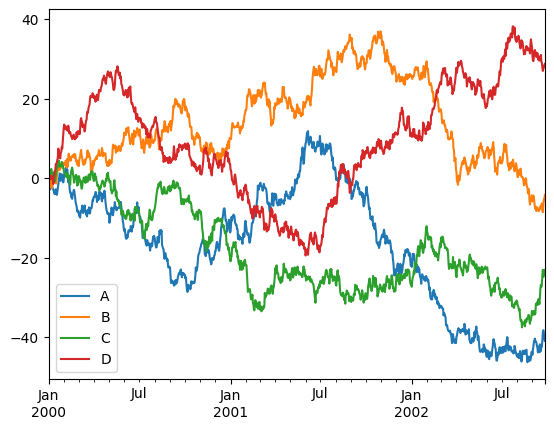

In [228]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')